### 앞으로 '모두카페'가 더 잘되기 위한 운영 전략을 제시해주세요!

**핵심 문제: '모두카페'의 상태는 어떤가?**

**필수 문제**
1. 월별 매출액 추세
2. 가장 인기있는 음식/음료
3. 가장 많이 팔린 입장권 종류

**내가 정의한 문제**
1. 월별 입장권 매출액 추세
2. 요일별 이용객 수
3. 시간대별 이용객 수

월별, 요일별, 시간대별 약점을 찾아 보완하여 매출에 기여하자!

__데이터 불러오기__

In [21]:
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data

ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/entry_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/item_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/item_entry_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/sales_data.csv': File exists


In [22]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [23]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [24]:
# 시간별 입장 기록 데이터
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [25]:
# 시간별 음식/음료 판매 데이터
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [26]:
# 판매하고 있는 음식/음료 종류와 가격
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [27]:
# 판매하고 있는 입장권 종류와 가격
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


__데이터 분석하기__

**필수 문제1: 월별 매출액 추세(sales_data를 이용합니다.)**
<br>월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
<br>힌트: groupby() 함수를 사용하세요.

In [28]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_data의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [29]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].replace(',','',regex=True) # 정규식 패턴

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = pd.to_numeric(temp_var['결제금액'])

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

상대적으로 2021년 2월과 2022년 4월의 금액은 월별 매출액이라고 보기에는 무리가 있어 보인다.
<br>이때 키오스크를 새로 설치한 것은 아닐까...?
<br>이상치로 판단되어 데이터를 제거하기로 결정하였다.

In [30]:
# 이상치 제거하기
payment_data = payment_data.drop(['2021-02','2022-04'])
payment_data

date
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
Name: 결제금액, dtype: int64

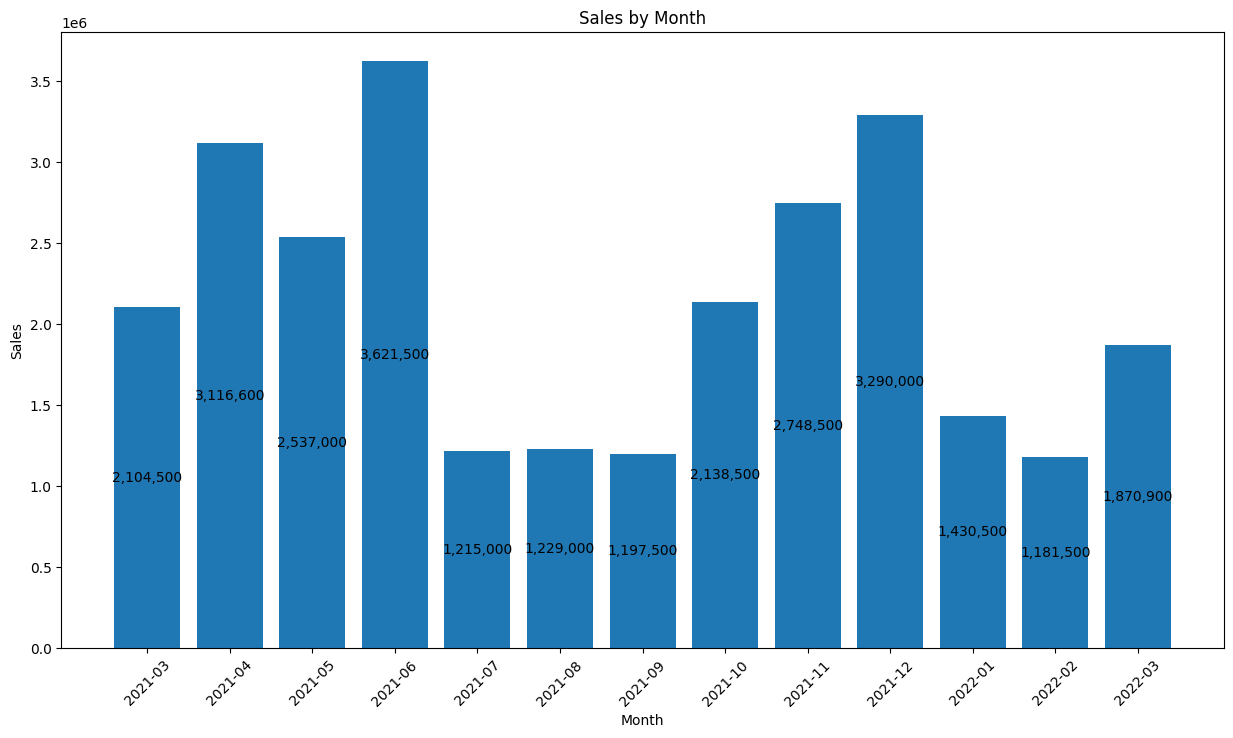

In [31]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,8)) # 가로 15, 세로 8로 그래프 사이즈 설정
ax = plt.bar(payment_data.index, payment_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Sales by Month')
plt.xticks(rotation=45) # X축 텍스트 방향을 45도 정도 돌려서 표시
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)**
<br>여러 메뉴들을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
<br>힌트: value_counts() 함수를 사용하세요.

In [32]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
temp_var_sales = temp_var[temp_var['판매수량'] != -1]
popular_list = temp_var_sales['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = popular_list.reset_index()
items_count.columns = ['상품명', '판매수량']
items_count = items_count.head(10)
items_count

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [33]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


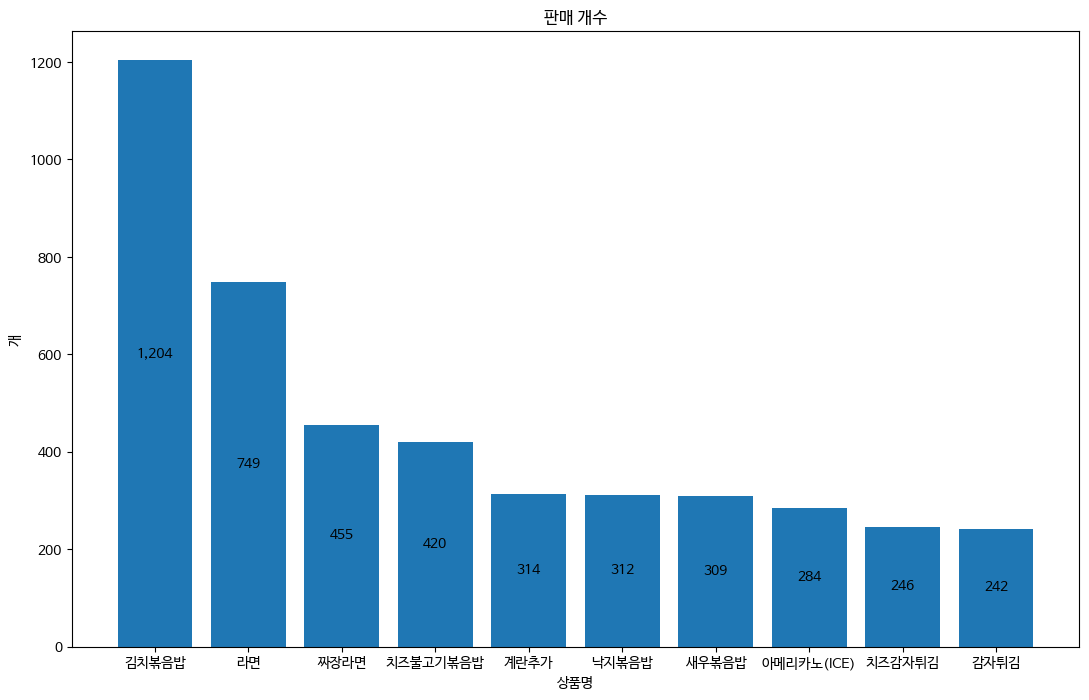

In [34]:
# 집계 결과를 시각화하기
plt.figure(figsize=(13,8))
ax = plt.bar(items_count['상품명'], items_count['판매수량'])
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('판매 개수')
plt.xlabel('상품명')
plt.ylabel('개')
plt.show()

In [35]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var_sales['결제금액'].groupby(temp_var_sales['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment = items_payment.reset_index().rename(columns={'결제금액': '매출'})
items_payment = items_payment.head(10)
items_payment

,상품명,매출
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


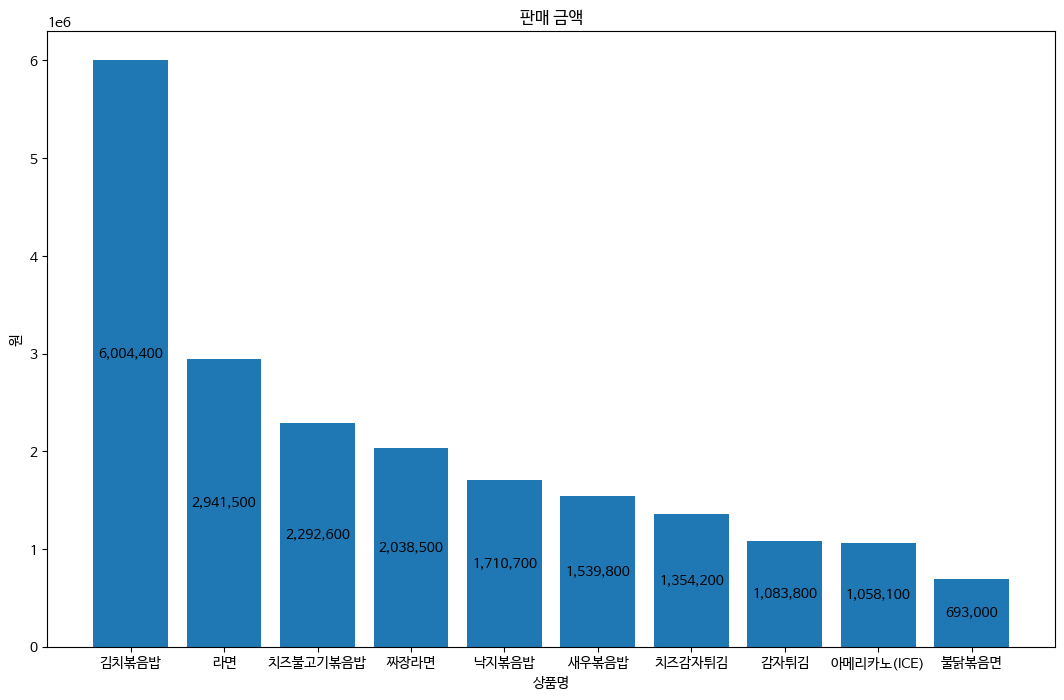

In [36]:
# 집계 결과 시각화하기
plt.figure(figsize=(13,8))
ax = plt.bar(items_payment['상품명'], items_payment['매출'])
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('판매 금액')
plt.xlabel('상품명')
plt.ylabel('원')
plt.show()

**필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)**
<br>여러 입장권 종류를 판매 매출순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
<br>힌트: value_counts() 함수를 사용하세요.

In [37]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = pd.to_numeric(temp_var['금액'])

# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets = tickets.head(10)
tickets

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

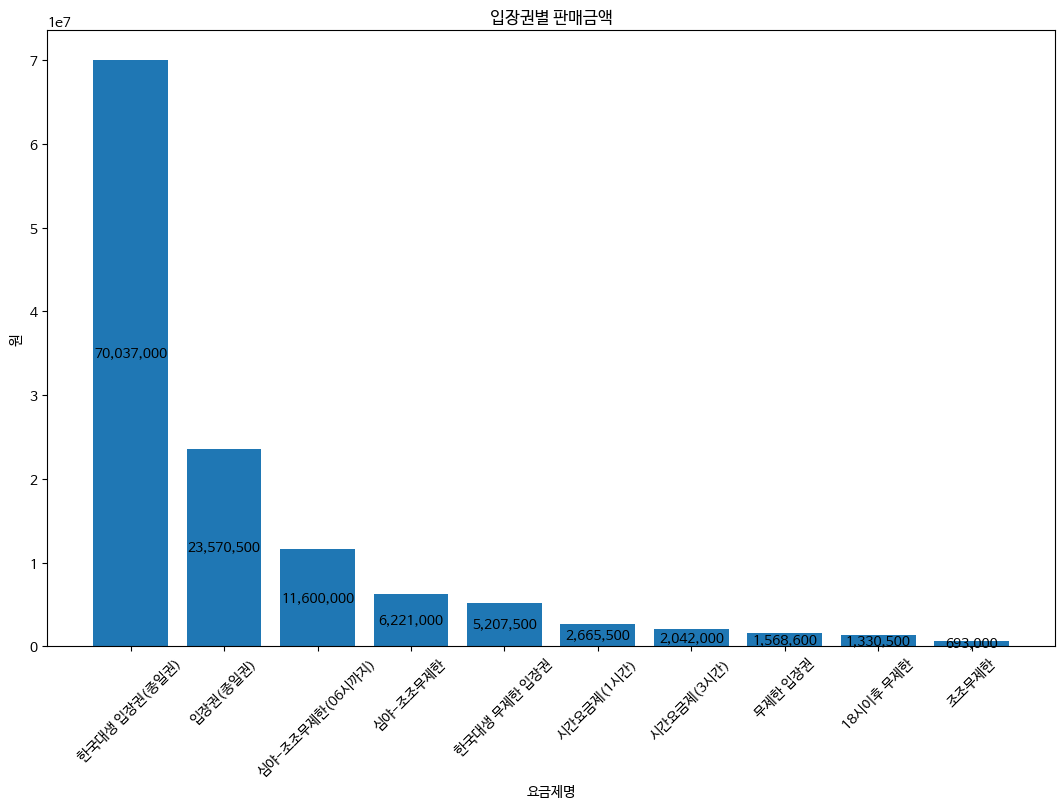

In [38]:
# 집계 결과 시각화하기
plt.figure(figsize=(13,8))
ax = plt.bar(tickets.index, tickets)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('입장권별 판매금액')
plt.xticks(rotation=45)
plt.xlabel('요금제명')
plt.ylabel('원')
plt.show()

__내가 정의한 문제 해결하기__

**내가 정의한 문제1: 월별 입장권 매출액 추세**
<br>월별 입장권 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

In [39]:
# 문제 1: 월별 입장권 매출액 추세
#활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 date열을 만들고, entry_data의 입실 중 앞에서 7번째 값까지 할당
temp_var['date'] = entry_data['입실'].str[:7]

# '금액' 칼럼 값이 '0'인 데이터를 제외하고, entry_data의 금액열을 date 기준으로 집계하기
temp_var = temp_var[temp_var['금액'] != 0]
tickets_payment_data = temp_var['금액'].groupby(temp_var['date']).sum()
tickets_payment_data

date
2021-02      292800
2021-03     9831500
2021-04    16440000
2021-05    15073500
2021-06    15856500
2021-07     4783000
2021-08     3837000
2021-09     3815000
2021-10     9202500
2021-11    15157000
2021-12    13093000
2022-01     4815500
2022-02     4024500
2022-03     8821000
2022-04      330600
Name: 금액, dtype: int64

음식/음료 월별 매출액 추세와 마찬가지로 2021년 2월과 2022년 4월 금액이 조금 이상한 것을 알 수 있다.
<br>이 또한 이상치로 판단하여 제거하기로 결정하였다.

In [40]:
# 이상치 제거하기
tickets_payment_data = tickets_payment_data.drop(['2021-02','2022-04'])
tickets_payment_data

date
2021-03     9831500
2021-04    16440000
2021-05    15073500
2021-06    15856500
2021-07     4783000
2021-08     3837000
2021-09     3815000
2021-10     9202500
2021-11    15157000
2021-12    13093000
2022-01     4815500
2022-02     4024500
2022-03     8821000
Name: 금액, dtype: int64

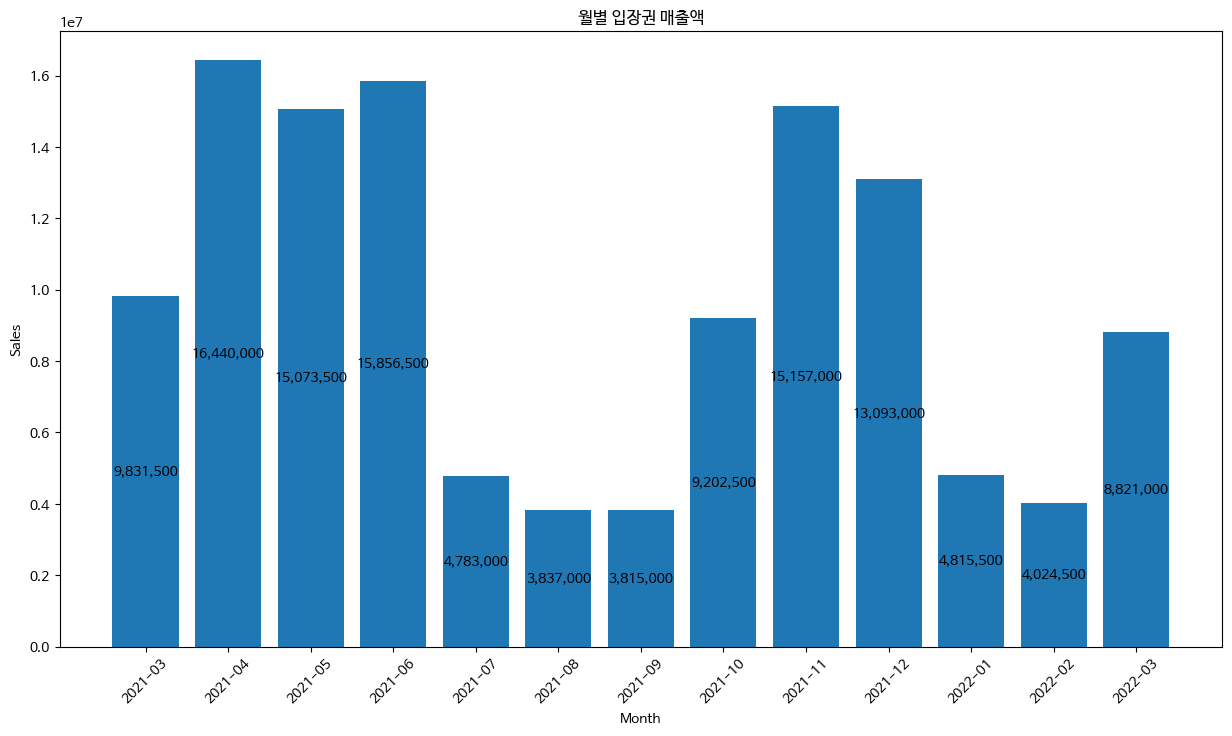

In [41]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,8))
ax = plt.bar(tickets_payment_data.index, tickets_payment_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('월별 입장권 매출액')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

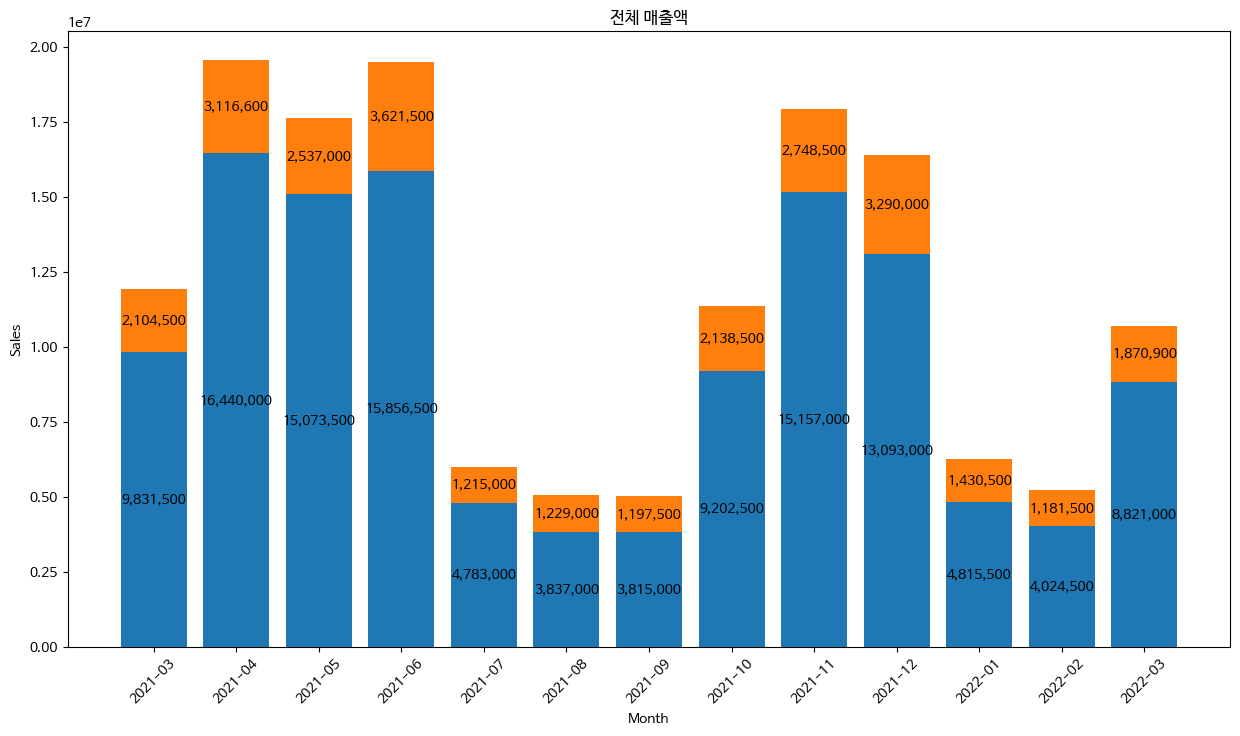

In [42]:
# 월별 입장권 매출과 월별 음식/음료 매출 현황 시각화하기
plt.figure(figsize=(15,8))
ax = plt.bar(tickets_payment_data.index, tickets_payment_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
ax = plt.bar(payment_data.index, payment_data, bottom=tickets_payment_data) # 막대그래프 겹쳐지도록 설정
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('전체 매출액')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

위의 누적 막대그래프(Stacked Bar Chart)를 보면 음식/음료 매출액과 입장권 매출액이 상당한 차이를 보이는 것을 알 수 있다.
<br>전체 매출액에서 입장권 매출액이 차지하는 비중이 더 크기 때문에 입장권을 추가로 분석하기로 하였다.

**내가 정의한 문제2: 요일별 이용객 수**
<br>요일별(월~일) 이용객 수를 집계하고 그 결과를 시각화해봅니다.

In [43]:
# 문제 2: 요일별 이용객 수
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 입실 중 앞에서 7번째 값까지 할당
temp_var['입실'] = temp_var['입실'].str[:7]

# 입실열을 datetime 자료형으로 변환하기
temp_var['입실'] = pd.to_datetime(temp_var['입실'])

# temp_var의 요일열을 만들고 요일의 영어 이름 가져오기
temp_var['요일'] = temp_var['입실'].dt.day_name()
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date,요일
0,시간요금제(1시간),2022-04-01,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04,Friday
1,시간요금제(1시간),2022-04-01,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04,Friday
2,무제한 입장권,2022-04-01,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04,Friday
3,무제한 입장권,2022-04-01,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04,Friday
4,한국대생 무제한 입장권,2022-04-01,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,2022-04,Friday
...,...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-01,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02,Monday
22551,종일요금제,2021-02-01,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02,Monday
22552,종일요금제,2021-02-01,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02,Monday
22553,종일요금제,2021-02-01,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02,Monday


In [44]:
# temp_var의 고객열을 요일 기준으로 집계하기
customer = temp_var['고객'].groupby(temp_var['요일']).count()
customer = customer.reset_index().rename(columns={'고객': '고객수'})
customer

,요일,고객수
0,Friday,1701
1,Monday,4559
2,Saturday,3595
3,Sunday,762
4,Thursday,3838
5,Tuesday,5007
6,Wednesday,3093


In [45]:
# key 매개변수에 람다 함수를 이용하여 요일 순서대로 정렬하기
customer_data = customer.sort_values(by='요일', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True))
customer_data['요일'] = ['월', '화', '수', '목', '금', '토', '일'] 
customer_data

,요일,고객수
1,월,4559
5,화,5007
6,수,3093
4,목,3838
0,금,1701
2,토,3595
3,일,762


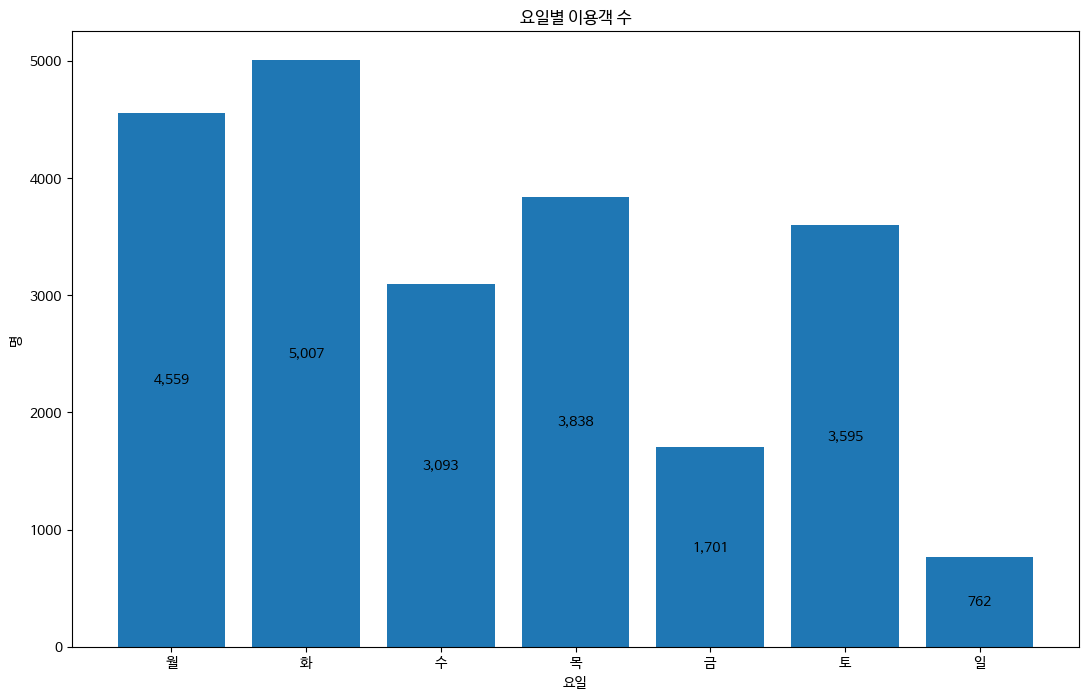

In [46]:
# 집계 결과를 시각화하기
plt.figure(figsize=(13,8))
ax = plt.bar(customer_data['요일'], customer_data['고객수'])
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('요일별 이용객 수')
plt.xlabel('요일')
plt.ylabel('명')
plt.show()

**내가 정의한 문제3: 시간대별 이용객 수**
<br>시간대별(0~23시) 이용객 수를 집계하고 그 결과를 시각화해봅니다.

In [47]:
# 문제 3: 시간대별 이용객 수
# 데이터 다시 불러오기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')

# temp_var로 다시 정의하기
temp_var = entry_data

# datetime 형식으로 변환하고 시간 정보만 추출하기
temp_var['입실시간대'] = pd.to_datetime(temp_var['입실']).dt.hour
temp_var['퇴실시간대'] = pd.to_datetime(temp_var['퇴실']).dt.hour
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,입실시간대,퇴실시간대
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,23,0
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,23,0
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,20,21
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,20,21
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,19,22
...,...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,13,14
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,13,14
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,13,14
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,13,14


In [48]:
# 각 시간대별로 몇 명이 있는지 저장할 데이터프레임 생성하고 초기화 시키기
total_customer = pd.DataFrame({'시간대': range(24),'이용객 수': [0] * 24})

# 입실시간대와 퇴실시간대 사이의 모든 시간대에 있는 이용객 수 계산하기
for i in range(len(temp_var)):
    entry_hour = temp_var.iloc[i]['입실시간대']
    exit_hour = temp_var.iloc[i]['퇴실시간대']
    total_customer.loc[entry_hour:exit_hour, '이용객 수'] += 1
    # 각 행의 입실시간대부터 퇴실시간대까지의 모든 시간대에 대해서 이용객 수 열의 값을 1씩 증가시킨다.
    # loc은 인덱스를 기반으로 행/열을 선택하고, iloc은 행/열 위치를 기반으로 선택하는 방법이다.
total_customer

,시간대,이용객 수
0,0,526
1,1,802
2,2,1010
3,3,1016
4,4,962
5,5,896
6,6,594
7,7,620
8,8,805
9,9,1168


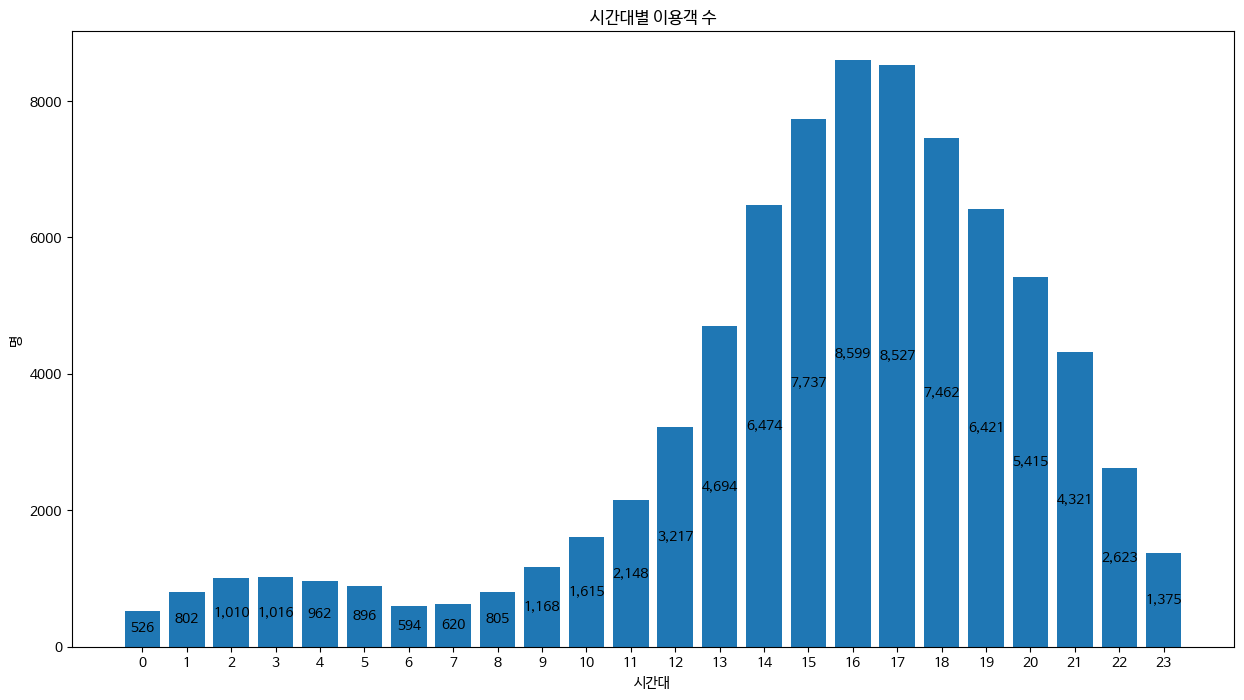

In [49]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,8))
ax = plt.bar(total_customer['시간대'], total_customer['이용객 수'])
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('시간대별 이용객 수')
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('명')
plt.show()

### 전략 수립 및 실행

**'모두카페'에게 어떤 전략을 제안할 수 있나요?**

월별 음식/음료 최고 매출액은 2021년 6월에 3,621,500원이고 월별 입장권 최고 매출액은 2021년 4월에 16,440,000원으로 입장권 매출액이 음식/음료 매출액보다 4.5배 정도 가량 크다는 것을 알 수 있다. 또한 한국대학교 앞에 위치하여 학생들의 방학 기간인 7월, 8월, 9월, 1월, 2월은 매출이 크게 감소하는 것을 확인할 수 있다. 일주일 중 가장 사람이 많은 날은 월요일이고 반대로 가장 적은 날은 일요일임을 알 수 있으며 16시부터 17시까지 스터디카페를 이용하는 사람이 가장 많고 점심시간 전까지는 이용하는 사람이 현저히 적은 것을 알 수 있다.

1. 방학 때 입장권(한국대생 아닌) 할인 → 입장권 매출 2위인 일반 이용객 수도 늘리면서 월별 매출액에서 저조한 방학 기간 공략
2. 일요일 프로모션: 김치 볶음밥 무료 (일별 매출에서 저조한 일요일 공략, 잘 나가는 김치 볶음밥으로 유인)
3. 점심 시간대(11시~1시)에 한국대생 식사 할인 → 시간대별 매출에서 저조한 점심시간 매출 상승 도모
4. SNS을 통해 이런 프로모션에 대한 정보를 홍보하고 만족도 조사를 실시하자!

### 회고

#### 어려웠던 점

필수 문제를 다 풀고 나서 데이터 자체에 생각보다 문제가 많다는 것을 알게 되었다. 일단 entry_data에서 요금제명, 입실, 퇴실, 이용, 위치, 금액, 구분, 고객 모든 값이 다 같은 중복이 굉장히 많아서 여기서 어떻게 해석을 해야 할지 고민을 많이 했던 것 같다. 입력 오류로 생긴 결측치라고 판단하기에는 중복되는 데이터가 너무 많아서 한명이 여러명의 입장권까지 같이 결제를 진행했을 수 있다는 전제하에 중복값들을 제거하지 않고 그대로 사용하기로 하였다. 또한 entry_data와 item_entry_data의 데이터를 결합하여 분석을 진행하고자 하였는데 요금제명과 상품명이 일치하지 않고 금액 또한 일치하지 않아 두 데이터 간의 연관성을 찾지 못 하여 분석을 포기할 수 밖에 없었다.

데이터 전처리가 생각보다 정말 많은 시간이 소요되고 많은 생각이 필요한 작업인 것 같다 🥲

#### 새로 알게 된 것!!!💡 ####

***regex=True***
<br>문자열 일부만 치환하고 싶은 경우는 regex=True를 설정해 정규 표현식으로 문자열 치환을 원하는 부분만 할 수 있다.
<br>특정 컬럼만 일부 문자열을 치환하고 싶은 경우에는 정규 표현식을 사용하지 않아도 변경할 수 있다.

***reset_index()***
<br>인덱스를 리셋 시키는데 사용한다.
<br>기본값으로 인덱스 값들을 DataFrame의 열로 전송하며, 새로운 단순한 정수 인덱스를 세팅한다.

    사용형식)
    DataFrame.reset_index(drop=False, inplace=False) # 기본값은 drop=False
    drop => 인덱스로 세팅한 열을 DataFrame내에서 삭제할지 여부를 결정
    inplace => 원본 객체를 변경할지 여부를 결정

***Stacked Bar Chart***
<br>누적 막대그래프를 그릴 때는 plt.bar() 두 개를 선언하고 위에 올 값으로 bar를 그릴 때에는 bottom에다가 아래 깔릴 값을 넣어준다.
<br>예시) bottom=tickets_payment_data

***pd.to_datetime()***
<br>어떤 날짜를 나타내는 문자열을 정해는 format을 기반으로 Date 형식으로 바꿔주는 역할을 한다.
    
    dt.day_name() => 요일을 문자열로 추출(영어)
    dt.hour => 시간 추출

***pd.Categorical***
<br>Pandas에는 정수 기반의 범주형 데이터를 표현(인코딩)할 수 있는 Categorial형이라고 하는 특수한 데이터형이 존재한다.

***iloc/loc***
<br>loc은 인덱스를 기반으로 행/열을 선택하고, iloc은 행/열 위치를 기반으로 선택하는 방법이다.

#### 나의 다짐 👊 ####
처음으로 데이터분석 프로젝트를 진행해봤는데 노드를 통해 학습하면서 다 이해했다고 생각했는데 막상 직접 코드를 짜려고 하니 막막했던 것 같다. 실제로 직접 해보는게 얼마나 중요한지를 다시 한번 느끼게 되었고 이번 프로젝트를 하면서 '데이터분석가는 이런 일을 하는구나~' 라고 알게 된 좋은 기회였던 것 같다. 팀원들과 소통하면서, 또 다른 팀들의 발표를 통해 많은 새로운 정보를 얻게 되어 매우 유익한 시간이였다. 프로젝트 발표는 처음이라 걱정도 많이 되고 긴장도 많이 했는데 앞으로의 프로젝트는 조금 더 즐기면서 할 수 있을 것 같다!

다음 프로젝트도 너무 기대가 된다 🤩🤩🤩

*** 참고한 레퍼런스 ***
<br>[Pandas] 파이썬 판다스 요일 추출 방법 정리(weekday, day_name(),... https://jimmy-ai.tistory.com/331
<br>인덱스의 설정과 리셋(배정, set_index, reset_index)-pandas(21) https://kongdols-room.tistory.com/123
<br>TIL. 28 람다 표현식(lambda) 사용하기 https://codermun-log.tistory.com/66
<br>How to use loc and iloc for selecting data in Pandas https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79